# **Credit Card Clustering Analysis**
### The dataset is taken from Kaggle and stored at github. In this analysis we are finding the purchasing behaviour through their credit card and the Amount each person have in their accounts which will identify them as frugal or prodigal in their spending.





**Installing the Libraries**

In [ ]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# imputation
from sklearn.impute import KNNImputer

**Reading the Dataset**

In [ ]:
# importing the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/CreditCard.csv')

#Printing first 5 rows
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data = data.drop(['CUST_ID'], axis=1)
# describing the data
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## **Imputing Null Values**
I use KNN imputer: Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.

In [ ]:
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data = data.dropna(subset=['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'])
imp_data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# **Data Visualization**

## **Correlation matrix (heatmap style)**
To explore the dataset in depth, we will try to visualize the data in a more meaningful manner:

1.   Correation matrix (heatmap style)
2.   Correlation matrix (zoomed heatmap style).
3.   Scatter plots between the most correlated variables (move like Jagger style).



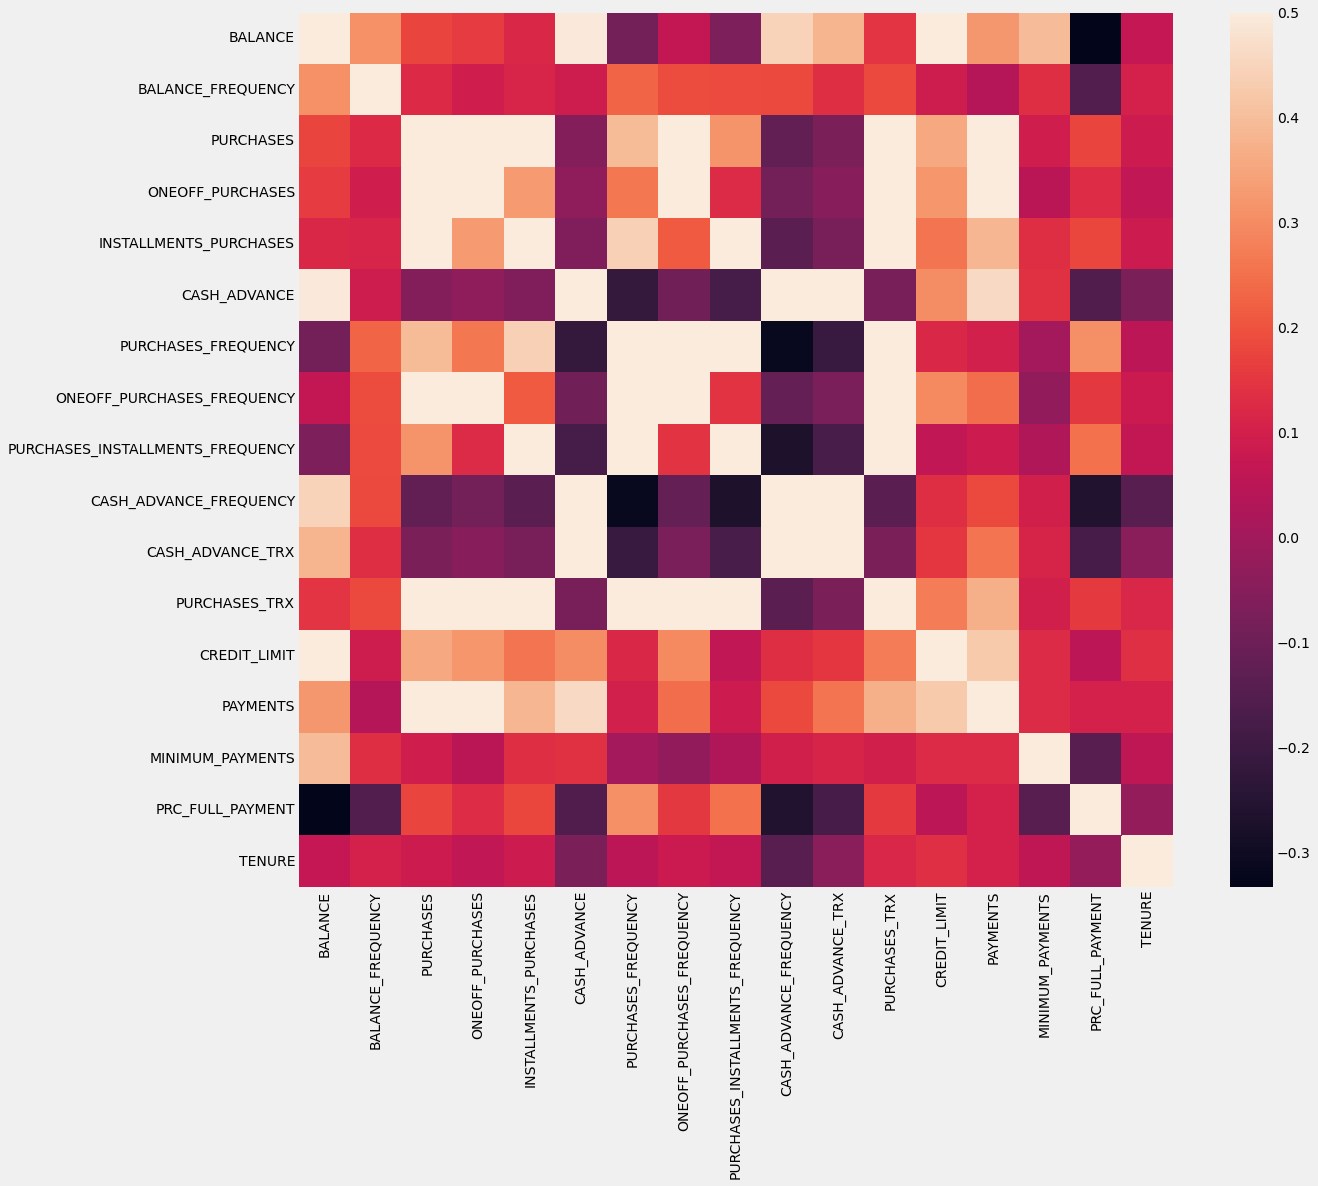

In [ ]:
# Create a heatmap to display correlations between each variable
# Graphical representation of data where the individual values contained in a matrix are represented as colors.

corrmat = data.corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat, vmax=.5, square=True);

['PURCHASES' 'ONEOFF_PURCHASES' 'PURCHASES_TRX' 'INSTALLMENTS_PURCHASES'
 'PAYMENTS' 'ONEOFF_PURCHASES_FREQUENCY' 'PURCHASES_FREQUENCY'
 'CREDIT_LIMIT' 'PURCHASES_INSTALLMENTS_FREQUENCY' 'PRC_FULL_PAYMENT'
 'BALANCE' 'BALANCE_FREQUENCY' 'MINIMUM_PAYMENTS' 'TENURE' 'CASH_ADVANCE']


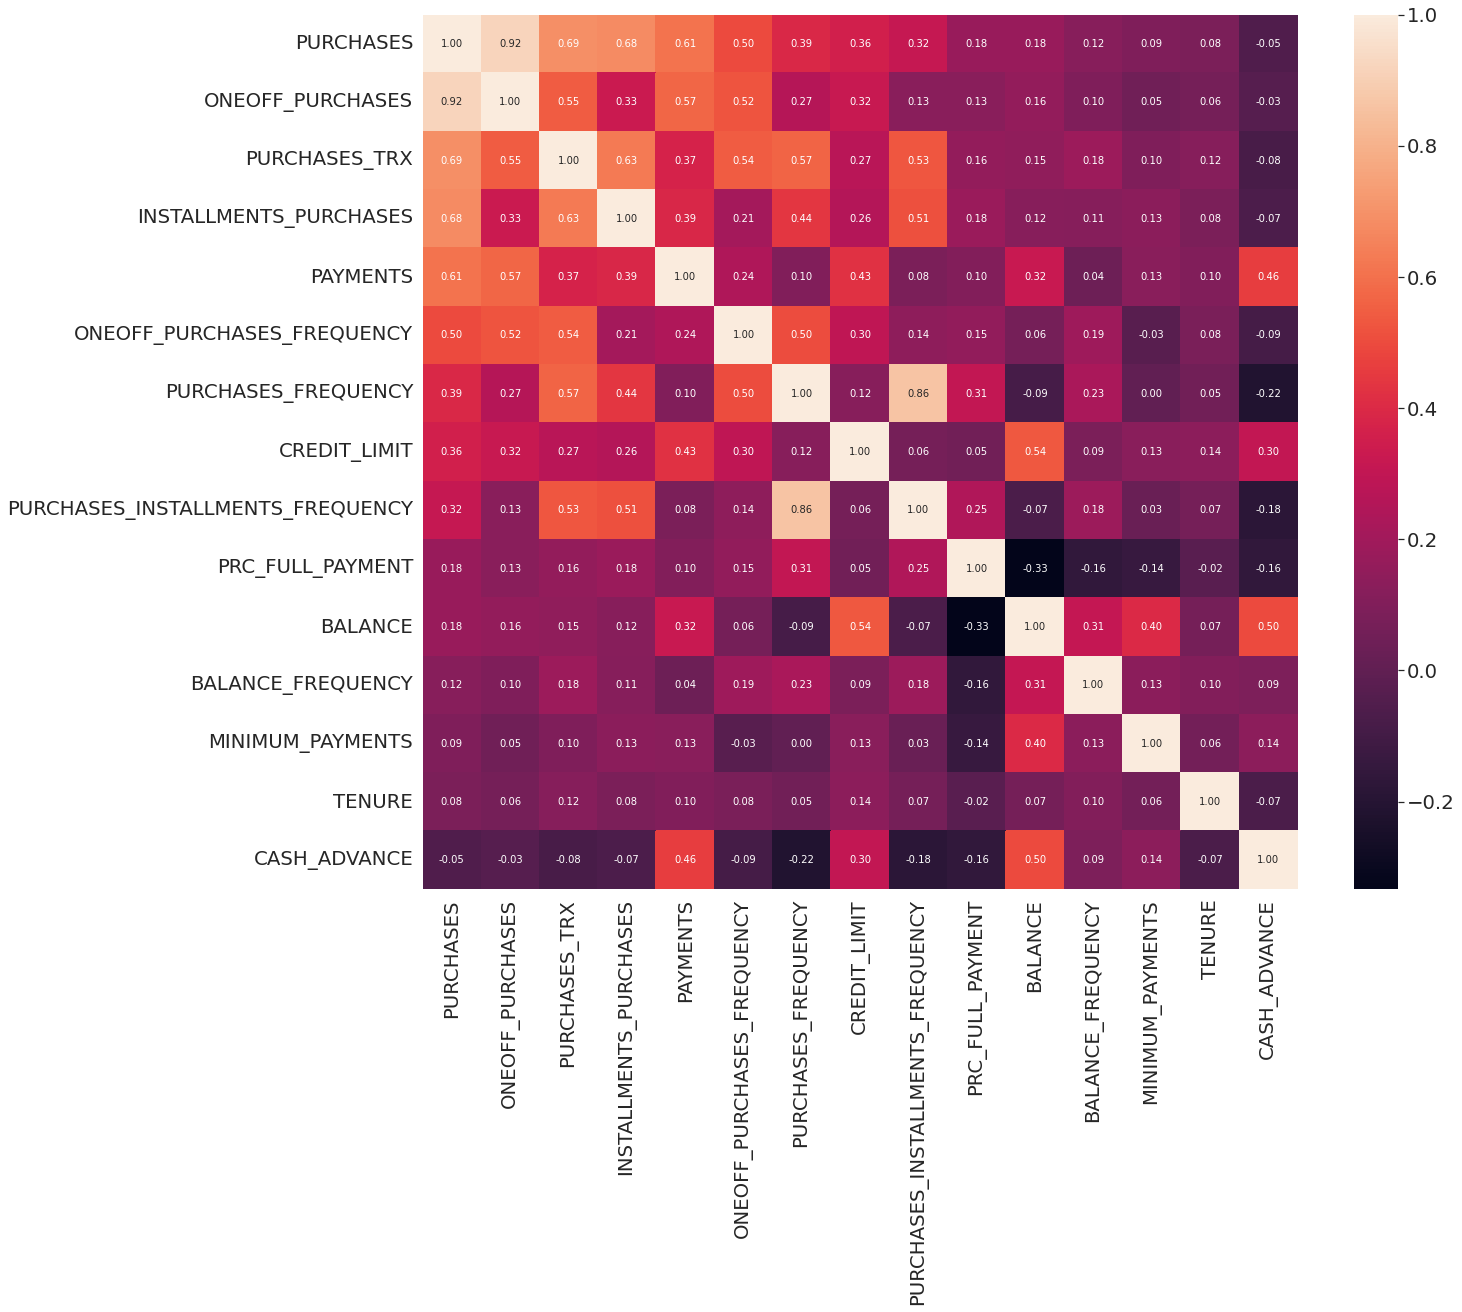

In [ ]:
#CreditCard correlation matrix
k = 15 #number of variables for heatmap
imp_cols = corrmat.nlargest(k,'PURCHASES')['PURCHASES'].index
print(imp_cols.values)
cm = np.corrcoef(data[imp_cols].values.T)
sns.set(font_scale=1.8)
plt.subplots(figsize=(18, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=imp_cols.values, xticklabels=imp_cols.values)
plt.show()

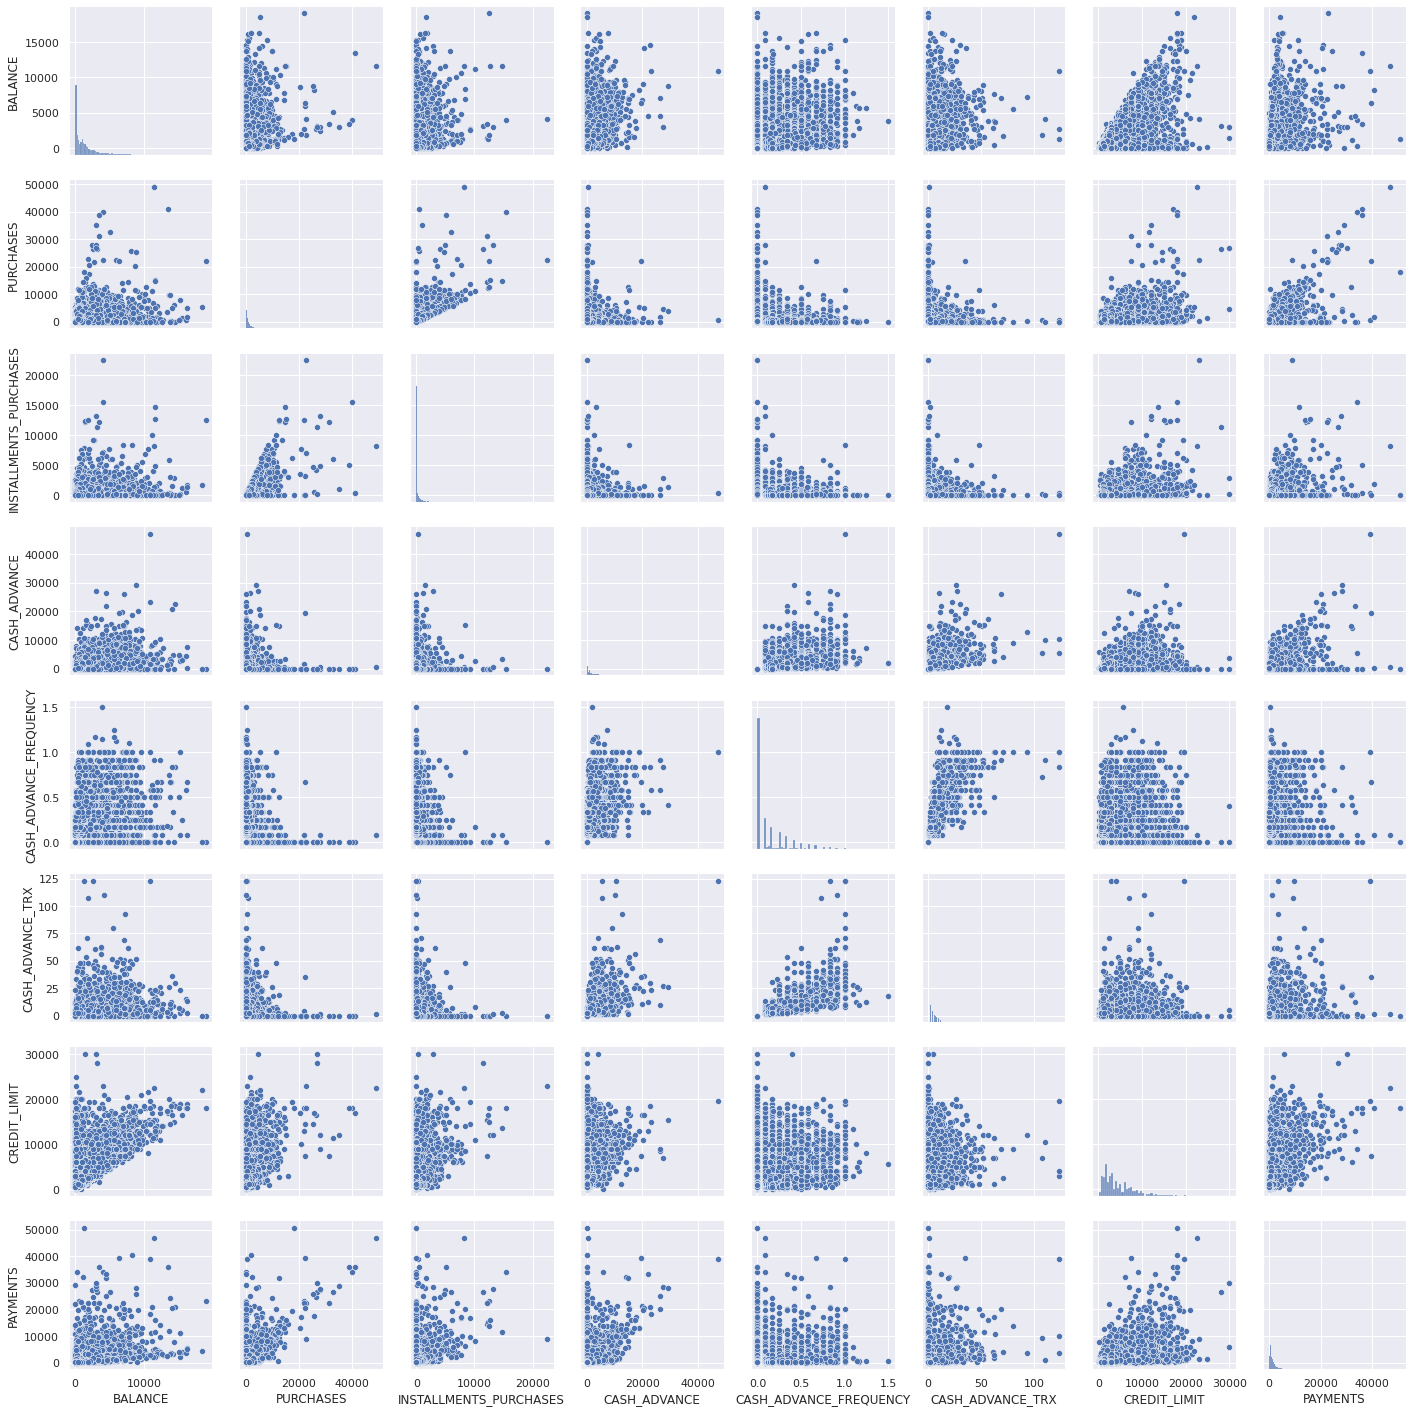

In [ ]:
#Using Pairplot
selected_columns = data.copy(deep=True)
selected_columns = selected_columns.drop(['ONEOFF_PURCHASES', 'PURCHASES_TRX', 'PURCHASES_FREQUENCY',  'MINIMUM_PAYMENTS','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PRC_FULL_PAYMENT', 'BALANCE_FREQUENCY', 'TENURE'], axis=1)
sns.set(font_scale=1)
plt.figsize=(20, 20)
sns.pairplot(selected_columns)
plt.show()



> ###  **From Correlation analysis**, I have figured out that there is some relationship between PURCHASE, PURCHASESTRX, PAYMENT, PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'BALANCE', 'MINIMUM_PAYMENTS' and 'CASH_ADVANCE'




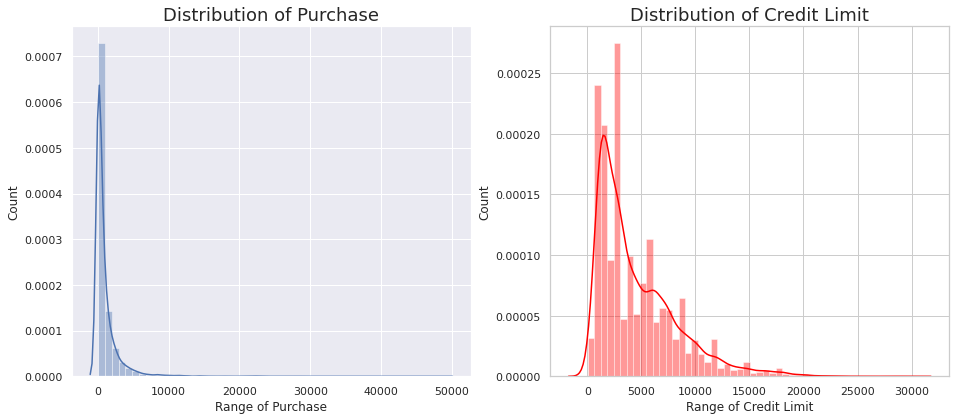

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['PURCHASES'])
plt.title('Distribution of Purchase', fontsize = 18)
plt.xlabel('Range of Purchase')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['CREDIT_LIMIT'], color = 'red')
plt.title('Distribution of Credit Limit', fontsize = 18)
plt.xlabel('Range of Credit Limit')
plt.ylabel('Count')
plt.show()

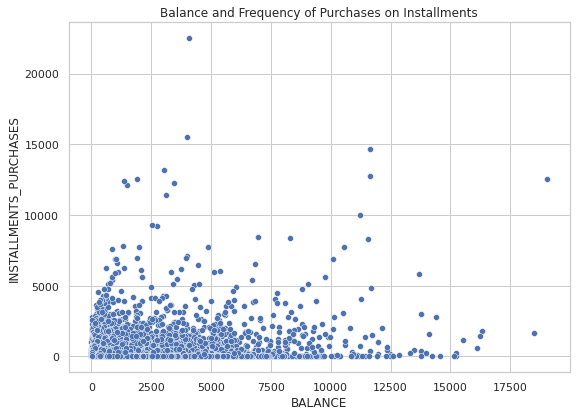

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data['BALANCE'], data['INSTALLMENTS_PURCHASES'])
plt.title('Balance and Frequency of Purchases on Installments')
plt.show()

## Clustering Analysis

In [ ]:
# Since we know that there are few columns which have a little or no impact on purchasing behaviour so we are eliminating them 

X = data.drop(['ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PRC_FULL_PAYMENT', 'BALANCE_FREQUENCY', 'TENURE'], axis=1)

#Scaling data
#Importing the library
from sklearn import preprocessing

#Passing the values of the dataset to Min-Max-Scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
x_scaled = min_max_scaler.fit_transform(X.values)
X = pd.DataFrame(x_scaled, columns=X.columns)
X.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0.002148,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826
1,0.168169,0.000000,0.000000,0.000000,0.136685,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034
2,0.131026,0.015766,0.018968,0.000000,0.000000,1.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210
3,0.042940,0.000326,0.000393,0.000000,0.000000,0.083333,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204
4,0.095038,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

This is really fun. First, I found out Inertia and no. of Clusters then I added arrows by taking the exact value where I found a significant change in inertia.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0) [13943.33494921605, 3090.5504927628735, 1275.7707051536381, 514.8756663221938, 445.5327766789644, 416.2853348372642, 393.0087224988427, 371.31652957292084, 349.9416099610267, 336.7953282405559]


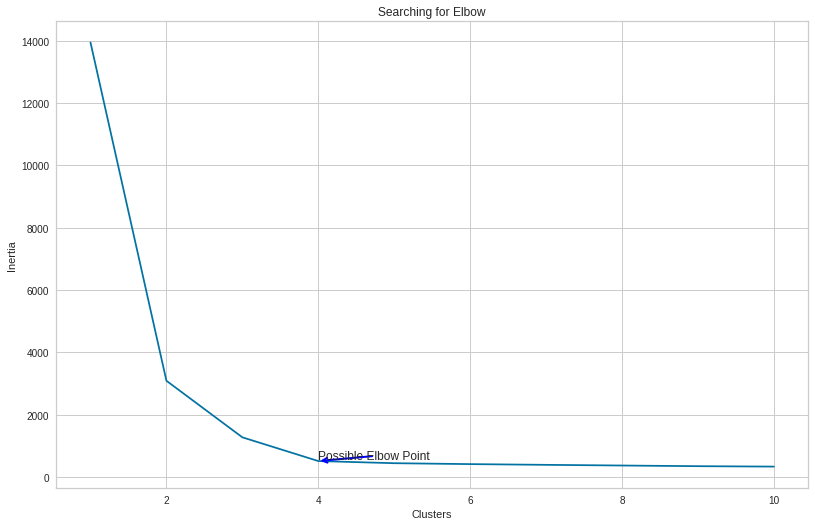

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
print(km,clusters)
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# # # Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, 514.87), xytext=(4, 580), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


## **K-Means Clustering

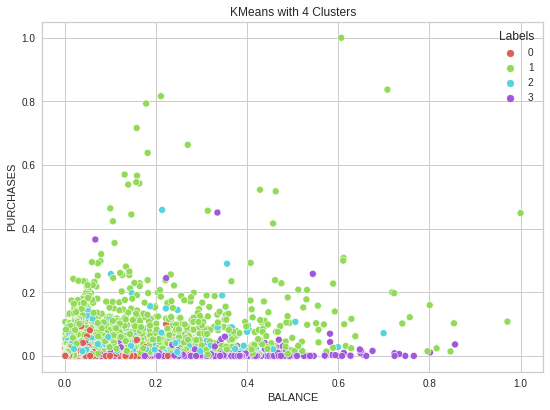

In [ ]:
km4 = KMeans(n_clusters=4).fit(X)
X['Labels'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['BALANCE'], X['PURCHASES'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

## **Silhouette Score**
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
* 1: Means clusters are well apart from each other and clearly distinguished.
* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* -1: Means clusters are assigned in the wrong way.

Silhouetter Score: 0.757


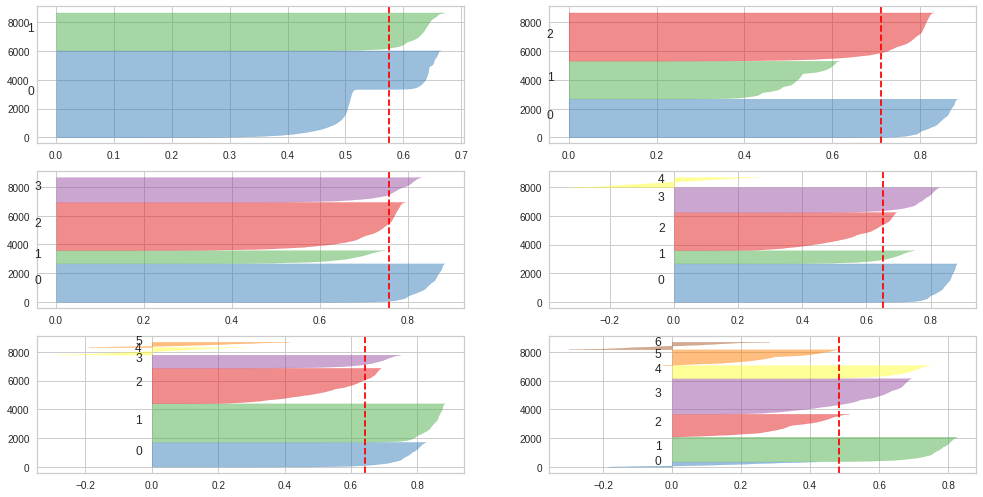

In [ ]:
from sklearn.metrics import silhouette_score as s
from yellowbrick.cluster import SilhouetteVisualizer

score = s(X, X['Labels'], metric='euclidean')
print('Silhouetter Score: %.3f' % score)

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=200, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

> ### **Silhouette analysis**

The Silhouetter Score: 0.757 and as we can see that it is because our clusters are densely packed.

Interpretations from Plot no. 2:
* This plot is seems to be an optimal choice because they both are above average line and there thickness shows that one cluster is denser than the second one.

Plot no . 4:
* It is evident that all of these clusters have same wideness except one which a little narrower, it shows that clusters separable.
* Also all of them are crosses or almost near to the average line.
* **Therefore, n-cluster=4 will be on optimum choice.**

Plot no 3,5,6,7:
* All of them are representing clusters far below average

> Since the datapoints are densely connected to each other it is a tad difficult to make clusters among them. However, we have found out that n_cluster=4 would be a good choice to divid them into 4 clusters:

We can analyze our 4 clusters in detail now:
* Label 0: If BALANCE is low and PURCHASES is high ➡ It means people who don't have enough balance but they make higher number of purchases, mostly on installemnts.
* Label 1: If BALANCE is low and PURCHASES is low ➡ It means there is small group of people who make lesses purchases due to Insufficient Balance.
* Label 2: If BALANCE is high and PURCHASES is high ➡ This cluster has sparse datapoints, which shows that with the increase in Balance some people tend to make higher number of purchases.
* Label 3: If BALANCE is high and PURCHASES is low ➡ This is also a sparsely connected cluster. It shows that some people who have higher Balance in their accounts but they spend little money to make Purchases.

## **Agglomerative Hierarchical Clustering**
The Agglomerative Clustering class will require two inputs:

n_clusters: The number of clusters to form as well as the number of centroids to generate.
linkage: The algorithm will merge the pairs of cluster that minimize this criterion.


1.   ‘ward’ minimizes the variance of the clusters being merged.

2.   ‘average’ uses the average of the distances of each observation of the two sets.
3.   ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
4.   ‘single’ uses the minimum of the distances between all observations of the two sets.

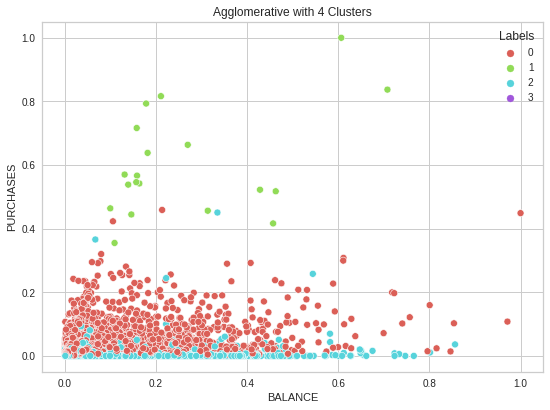

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['BALANCE'], X['PURCHASES'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('Agglomerative with 4 Clusters')
plt.show()

## **Density Based Clustering (DBSCAN)**
Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.
It works based on two parameters: Epsilon and Minimum Points
1.  Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
2.  minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)


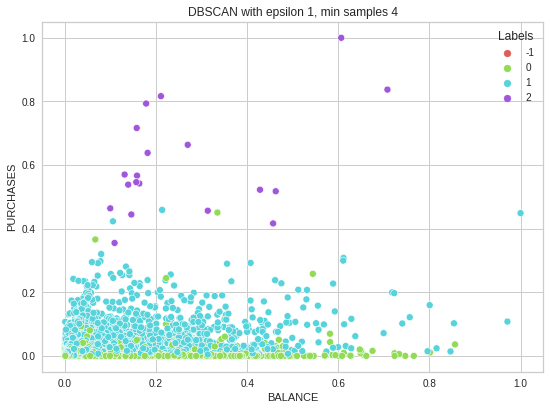

In [ ]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=1, min_samples=6).fit(X)
print(db)
X['Labels'] = db.labels_
# print(db.labels_)
plt.figure(figsize=(8, 6))
sns.scatterplot(X['BALANCE'], X['PURCHASES'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 1, min samples 4')
plt.show()

## **Mean Shift Algorithm**
It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

* The algorithm automatically sets the number of clusters
* However, the algo estimates the bandwidth but quantile variable has an effect on setting the bandwidth manually. 



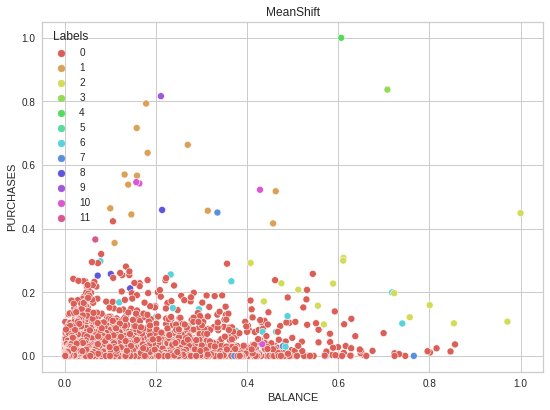

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.5)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['BALANCE'], X['PURCHASES'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

## **Conclusion**



> So far I have implemented 4 most popular clustering algorithms: Kmeans, Aggleromative, DBScan and Mean Shift.


> Using elbow method, I found that n=4 clusters would be a good choice..
In both Kmeans and Aggleromative Clustering, the formation of clusters were clean and same while few outliers can be seen vividly.

> **K-Means and Aggleromative:**
They both have divided data points into 4 clusters. However, due to dense behaviour we can see that there is alot of overlapping between data points making it difficult to distinguish.

> **In DBScan:**
I have set epsilon to 1 because data points were very close to eachother and kept the minimum no. of samples to 6. 
Here the algorithm made 3 clusters and without any outliers.

**Hence, we can say that DBScan has done a good job here.**

From DBScan, we can analyze our 3 clusters in detail now:
* *Label 0: Hand-to-Mouth*

> If BALANCE is low and PURCHASES is low ➡ It means there is small group of people who make lesses purchases due to Insufficient Balance.


* *Label 1: Frugal*

> If BALANCE is high and PURCHASES is low ➡ This is a sparsely connected cluster. It shows that some people who have higher Balance in their accounts but they spend little money to make Purchases. 

* *Label 2: Prodigal*

> If BALANCE is high and PURCHASES is high ➡ This cluster has sparse datapoints, which shows that with the increase in Balance some people tend to make higher number of purchases.

> **MeanShift Clustering:**
It has generated 3 clusters automatically. One cluster shows the vary in Balance but kept the purchase low.
Second cluster shows range of behaviour- Low to High
Third Cluster can be skipped because it contains neglibile datapoints that are hidden behind dense cluster. 

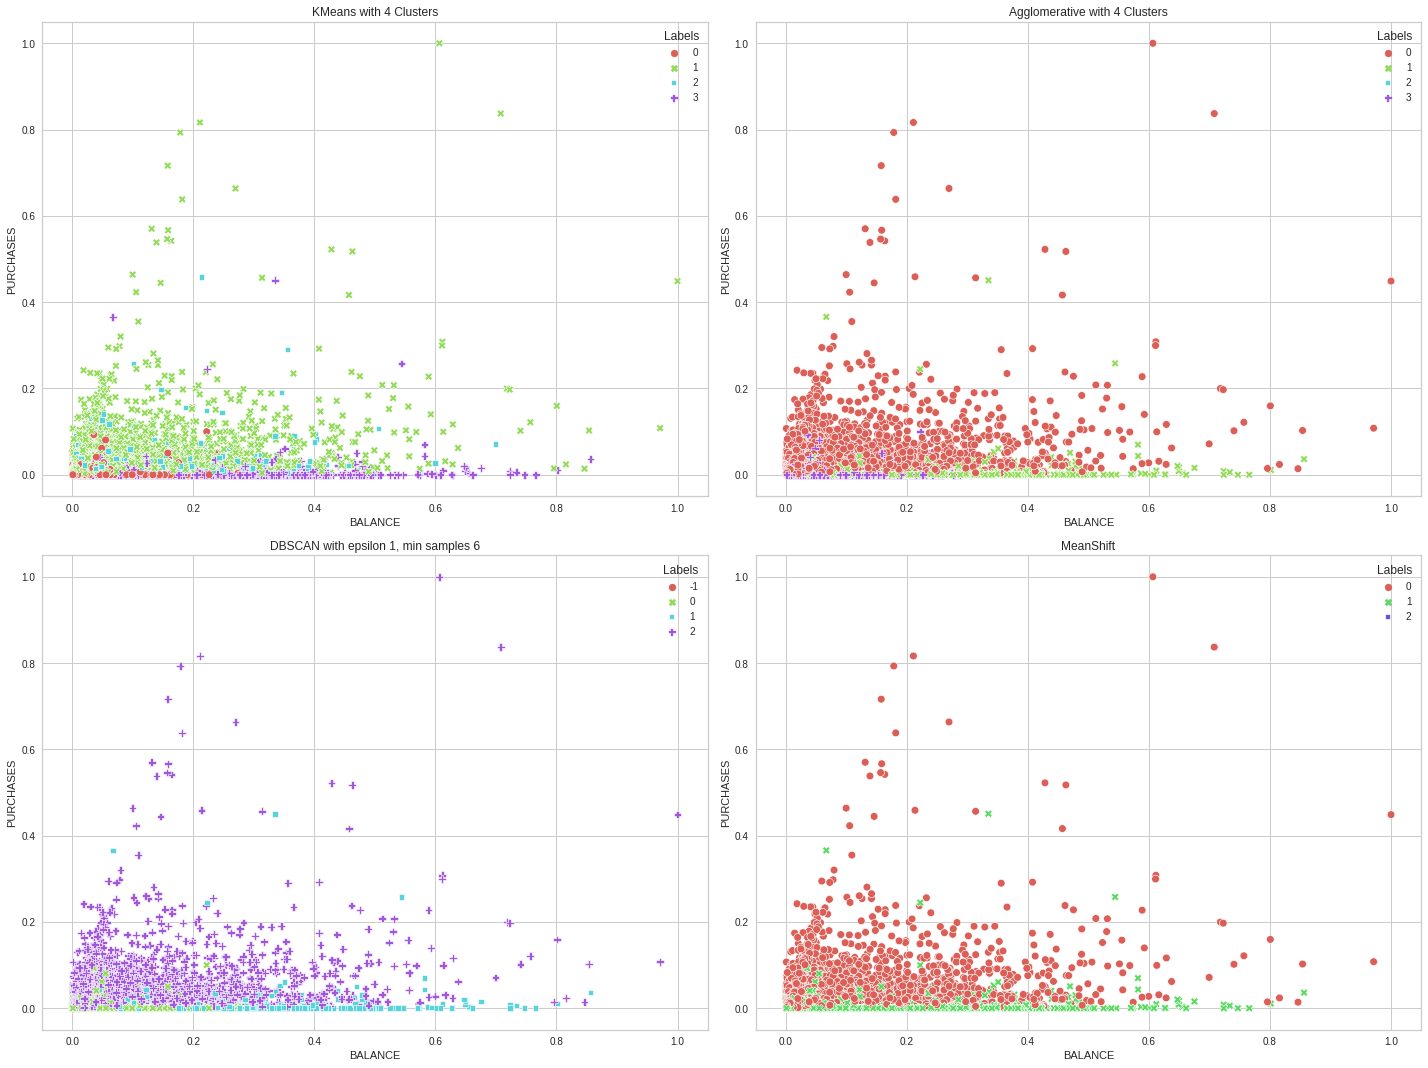

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=4).fit(X)
X['Labels'] = km4.labels_
sns.scatterplot(X['BALANCE'], X['PURCHASES'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 4), s=60, ax=ax)
ax.set_title('KMeans with 4 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['BALANCE'], X['PURCHASES'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 4), s=60, ax=ax)
ax.set_title('Agglomerative with 4 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=1, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(X['BALANCE'], X['PURCHASES'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 1, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.5)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['BALANCE'], X['PURCHASES'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()